## Wildlife Strikes
by <br>
Erica (finalProjectcheckpoint-ejmh), Katie (Final_Project-kvschull), Kelly (Project AWS start-chenruank), Morgan (finalProject-mashnia), and Prentice (Bird Airstrike-pdtTech).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

### Loading Dataset <br>
https://www.kaggle.com/datasets/faa/wildlife-strikes <br> <br>
https://nbaa.org/wp-content/uploads/aircraft-operations/safety/in-flight-safety/wildlife-strike-response/Wildlife-Strikes-to-Civil-Aircraft-1990-2020.pdf <br>

In [2]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position":str}
dataFrame = pd.read_csv('birdDatabase.csv', dtype=typeSpecification)
print(dataFrame.describe(include="all"))

            Record ID  Incident Year  Incident Month   Incident Day  \
count   174104.000000  174104.000000   174104.000000  174104.000000   
unique            NaN            NaN             NaN            NaN   
top               NaN            NaN             NaN            NaN   
freq              NaN            NaN             NaN            NaN   
mean    241204.036915    2006.036392        7.171840      15.712264   
std      94013.682213       6.747708        2.790152       8.799405   
min       1000.000000    1990.000000        1.000000       1.000000   
25%     205411.750000    2001.000000        5.000000       8.000000   
50%     249102.500000    2007.000000        8.000000      16.000000   
75%     322592.250000    2012.000000        9.000000      23.000000   
max     367445.000000    2015.000000       12.000000      31.000000   

       Operator ID Operator Aircraft Aircraft Type Aircraft Make  \
count       174104   174104   174104        133074        131051   
unique     

In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

### Hypothesis: How does the incident month, aircraft operator, type of aircraft, and animal species have on the likelihood of an injury occuring? <br> 
Incident month: column 2 <br>
operator: column 5 <br>
aircraft: column 6 <br>
species: column 31 <br>
injury: column 35 <br>

In [4]:
cols = [dataFrame.columns[2], dataFrame.columns[5], dataFrame.columns[6], dataFrame.columns[20], dataFrame.columns[31], dataFrame.columns[35]]

In [5]:
dataFrame[cols].isnull().sum()

Incident Month         0
Operator               0
Aircraft               0
Airport              290
Species Name          80
Injuries          173875
dtype: int64

## Data Cleaning <br>
Need to replace null values in Injuries columns with zeros. Then replace some null values in Airport and Species Name with UNKNOWN.

In [6]:
dataFrame.Injuries = dataFrame.Injuries.fillna(0)
print(dataFrame.Injuries)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
174099    0.0
174100    0.0
174101    0.0
174102    0.0
174103    0.0
Name: Injuries, Length: 174104, dtype: float64


In [7]:
dataFrame.Airport = dataFrame.Airport.fillna('UNKNOWN')
dataFrame['Species Name'] = dataFrame['Species Name'].fillna('UNKNOWN')

In [8]:
print(dataFrame[cols].isnull().sum())

Incident Month    0
Operator          0
Aircraft          0
Airport           0
Species Name      0
Injuries          0
dtype: int64


### New table with cleaned data to build decison tree.

In [9]:
injuryRisk = dataFrame[cols]
injuryRisk

,Incident Month,Operator,Aircraft,Airport,Species Name,Injuries
0,1,DELTA AIR LINES,B-757-200,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,GULL,0.0
1,1,HAWAIIAN AIR,DC-9,LIHUE ARPT,HOUSE SPARROW,0.0
2,1,UNKNOWN,UNKNOWN,LIHUE ARPT,BARN OWL,0.0
3,1,MILITARY,A-10A,MYRTLE BEACH INTL,UNKNOWN MEDIUM BIRD,0.0
4,1,MILITARY,F-16,JACKSONVILLE INTL,FINCH,0.0
...,...,...,...,...,...,...
174099,9,SOUTHWEST AIRLINES,B-737-700,UNKNOWN,UNKNOWN SMALL BIRD,0.0
174100,9,SOUTHWEST AIRLINES,B-737-700,DALLAS LOVE FIELD ARPT,UNKNOWN SMALL BIRD,0.0
174101,9,BUSINESS,CITATIONJET,MIAMI INTL,TURKEY VULTURE,0.0
174102,9,HORIZON AIR,DHC8 DASH 8,PORTLAND INTL (OR),HERMIT THRUSH,0.0


In [10]:
injuryRisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Incident Month  174104 non-null  int64  
 1   Operator        174104 non-null  object 
 2   Aircraft        174104 non-null  object 
 3   Airport         174104 non-null  object 
 4   Species Name    174104 non-null  object 
 5   Injuries        174104 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.0+ MB


In [11]:
print(injuryRisk.Injuries.value_counts())
print(injuryRisk.Injuries.value_counts().sum())

0.0      173875
1.0         178
2.0          42
5.0           2
7.0           2
4.0           2
3.0           2
100.0         1
Name: Injuries, dtype: int64
174104


New data frame called inputs for encoding labels and splitting the target data.

In [12]:
inputs = injuryRisk.drop('Injuries', axis='columns')
target = injuryRisk['Injuries']

In [13]:
inputs

,Incident Month,Operator,Aircraft,Airport,Species Name
0,1,DELTA AIR LINES,B-757-200,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,GULL
1,1,HAWAIIAN AIR,DC-9,LIHUE ARPT,HOUSE SPARROW
2,1,UNKNOWN,UNKNOWN,LIHUE ARPT,BARN OWL
3,1,MILITARY,A-10A,MYRTLE BEACH INTL,UNKNOWN MEDIUM BIRD
4,1,MILITARY,F-16,JACKSONVILLE INTL,FINCH
...,...,...,...,...,...
174099,9,SOUTHWEST AIRLINES,B-737-700,UNKNOWN,UNKNOWN SMALL BIRD
174100,9,SOUTHWEST AIRLINES,B-737-700,DALLAS LOVE FIELD ARPT,UNKNOWN SMALL BIRD
174101,9,BUSINESS,CITATIONJET,MIAMI INTL,TURKEY VULTURE
174102,9,HORIZON AIR,DHC8 DASH 8,PORTLAND INTL (OR),HERMIT THRUSH


In [14]:
target

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
174099    0.0
174100    0.0
174101    0.0
174102    0.0
174103    0.0
Name: Injuries, Length: 174104, dtype: float64

### Encoding labels

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_operator = LabelEncoder()
le_aircraft = LabelEncoder()
le_airport = LabelEncoder()
le_species = LabelEncoder()

Add each encoded column as a new column to inputs dataset, then drop the non-encoded columns from the inputs when making a new data frame called inputs_n.

In [17]:
inputs['Operator_n'] = le_operator.fit_transform(inputs['Operator'])
inputs['Aircraft_n'] = le_operator.fit_transform(inputs['Aircraft'])
inputs['Airport_n'] = le_operator.fit_transform(inputs['Airport'])
inputs['Species_n'] = le_operator.fit_transform(inputs['Species Name'])
inputs.head()

,Incident Month,Operator,Aircraft,Airport,Species Name,Operator_n,Aircraft_n,Airport_n,Species_n
0,1,DELTA AIR LINES,B-757-200,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,GULL,181,78,340,292
1,1,HAWAIIAN AIR,DC-9,LIHUE ARPT,HOUSE SPARROW,256,307,1109,324
2,1,UNKNOWN,UNKNOWN,LIHUE ARPT,BARN OWL,493,636,1109,39
3,1,MILITARY,A-10A,MYRTLE BEACH INTL,UNKNOWN MEDIUM BIRD,333,1,1360,623
4,1,MILITARY,F-16,JACKSONVILLE INTL,FINCH,333,371,922,236


In [18]:
inputs_n=inputs.drop(['Operator', 'Aircraft', 'Airport', 'Species Name'], axis='columns')
inputs_n

,Incident Month,Operator_n,Aircraft_n,Airport_n,Species_n
0,1,181,78,340,292
1,1,256,307,1109,324
2,1,493,636,1109,39
3,1,333,1,1360,623
4,1,333,371,922,236
...,...,...,...,...,...
174099,9,447,69,2065,624
174100,9,447,69,438,624
174101,9,121,270,1277,616
174102,9,261,316,1592,309


Can find encoded values by indexing.

In [19]:
inputs.iloc[5]

Incident Month               1
Operator          HAWAIIAN AIR
Aircraft                  DC-9
Airport             LIHUE ARPT
Species Name            MUNIAS
Operator_n                 256
Aircraft_n                 307
Airport_n                 1109
Species_n                  402
Name: 5, dtype: object

In [20]:
inputs_n.iloc[5]

Incident Month       1
Operator_n         256
Aircraft_n         307
Airport_n         1109
Species_n          402
Name: 5, dtype: int64

How to search for values within columns (remember to search in CAPS)

In [21]:
inputs[inputs['Species Name'].str.contains('CROW')]

,Incident Month,Operator,Aircraft,Airport,Species Name,Operator_n,Aircraft_n,Airport_n,Species_n
274,5,AMERICAN AIRLINES,B-727-200,DALLAS/FORT WORTH INTL ARPT,AMERICAN CROW,78,61,439,10
301,5,1US AIRWAYS,DC-9,JACKSONVILLE INTL,CROW,0,307,922,181
514,6,CONTINENTAL AIRLINES,B-737,CLEVELAND-HOPKINS INTL ARPT,AMERICAN CROW,168,62,363,10
516,6,PSA AIRLINES,BA-31 JETSTR,CLEVELAND-HOPKINS INTL ARPT,AMERICAN CROW,390,96,363,10
807,8,BUSINESS,LEARJET-25,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,CROW,121,464,103,181
...,...,...,...,...,...,...,...,...,...
173170,9,ALASKA AIRLINES,B-737-800,UNKNOWN,ORANGE-CROWNED WARBLER,67,70,2065,436
173217,9,UNKNOWN,UNKNOWN,FORT LAUDERDALE/HOLLYWOOD INTL,YELLOW-CROWNED NIGHT-HERON,493,636,633,706
173689,9,HORIZON AIR,DHC8 DASH 8,UNKNOWN,WHITE-CROWNED SPARROW,261,316,2065,660
173695,9,DELTA AIR LINES,A-320,UNKNOWN,WHITE-CROWNED SPARROW,181,6,2065,660


### Train, Test, Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = inputs_n
y = target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=16)

### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

# Fitting the model
lin_model = LinearRegression()
lin_model.fit(X, y)

# Returning the R^2 for the model
score = lin_model.score(X, y)
print('Relationship: {0}'.format(score))

Relationship: 0.00013024745986967012


### Decision Tree

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [27]:
model = tree.DecisionTreeClassifier(random_state=16)

In [28]:
model = model.fit(X_train, y_train)

In [29]:
model.score(inputs_n, target)

0.9993681937232918

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9976106235353582

Train

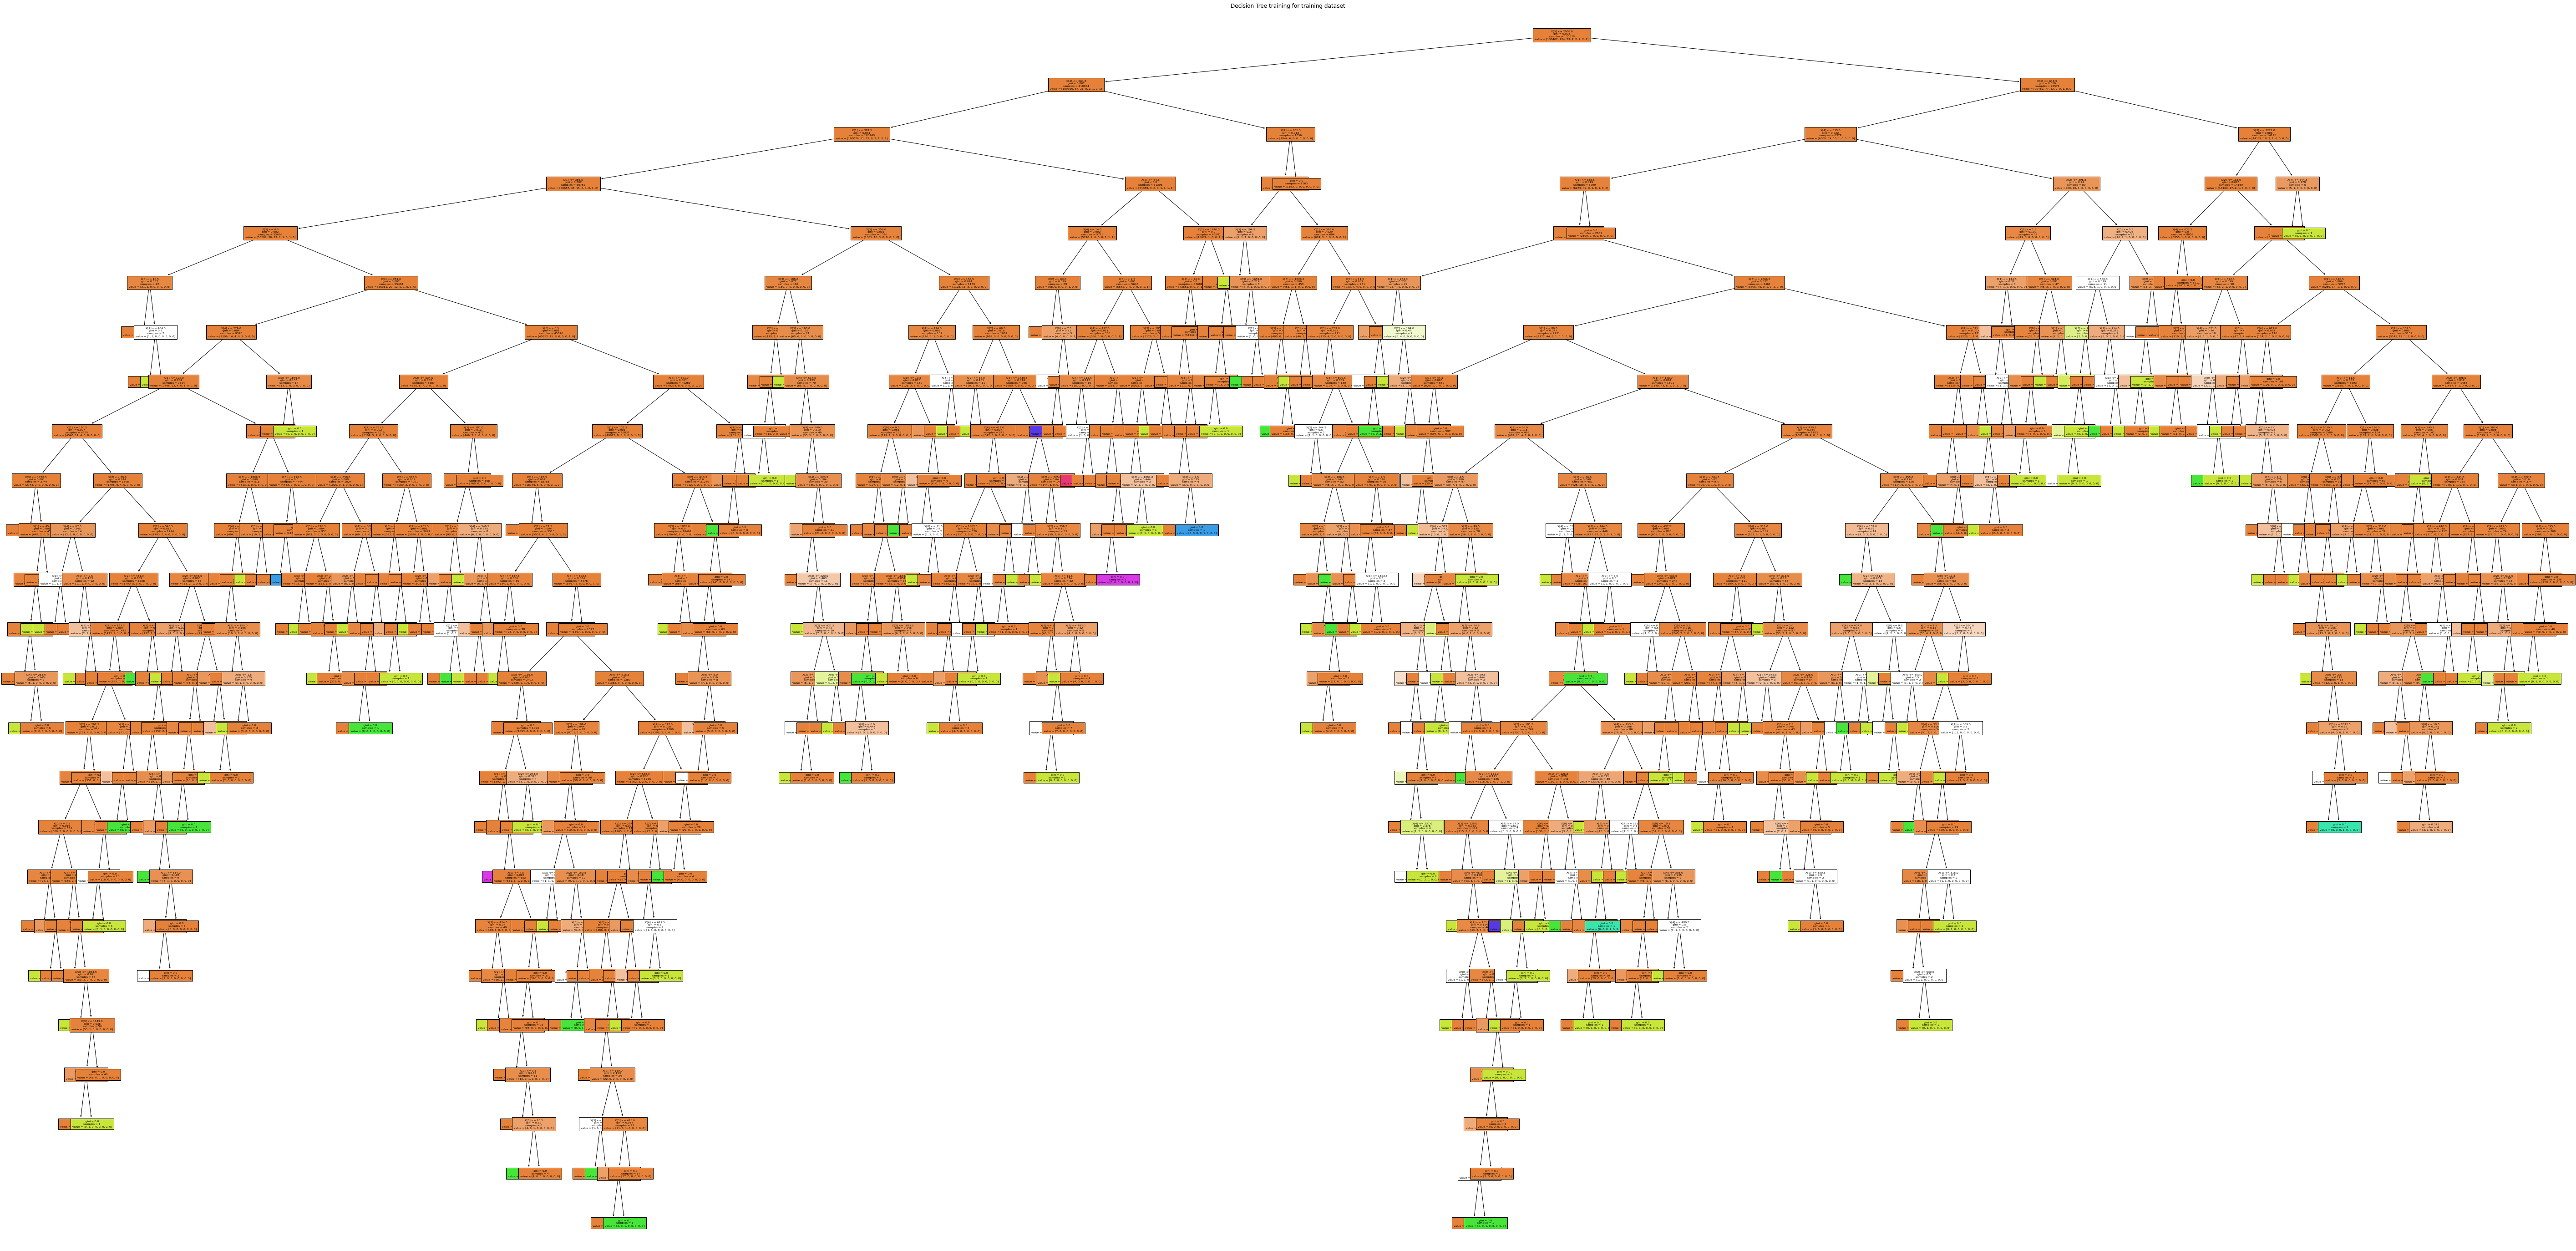

In [32]:
plt.figure(figsize=(100,50))
tree.plot_tree(model, filled = True, fontsize=6)
plt.title("Decision Tree training for training dataset")
plt.savefig('train_tree_high_dpi', dpi=100)
plt.show()

Test

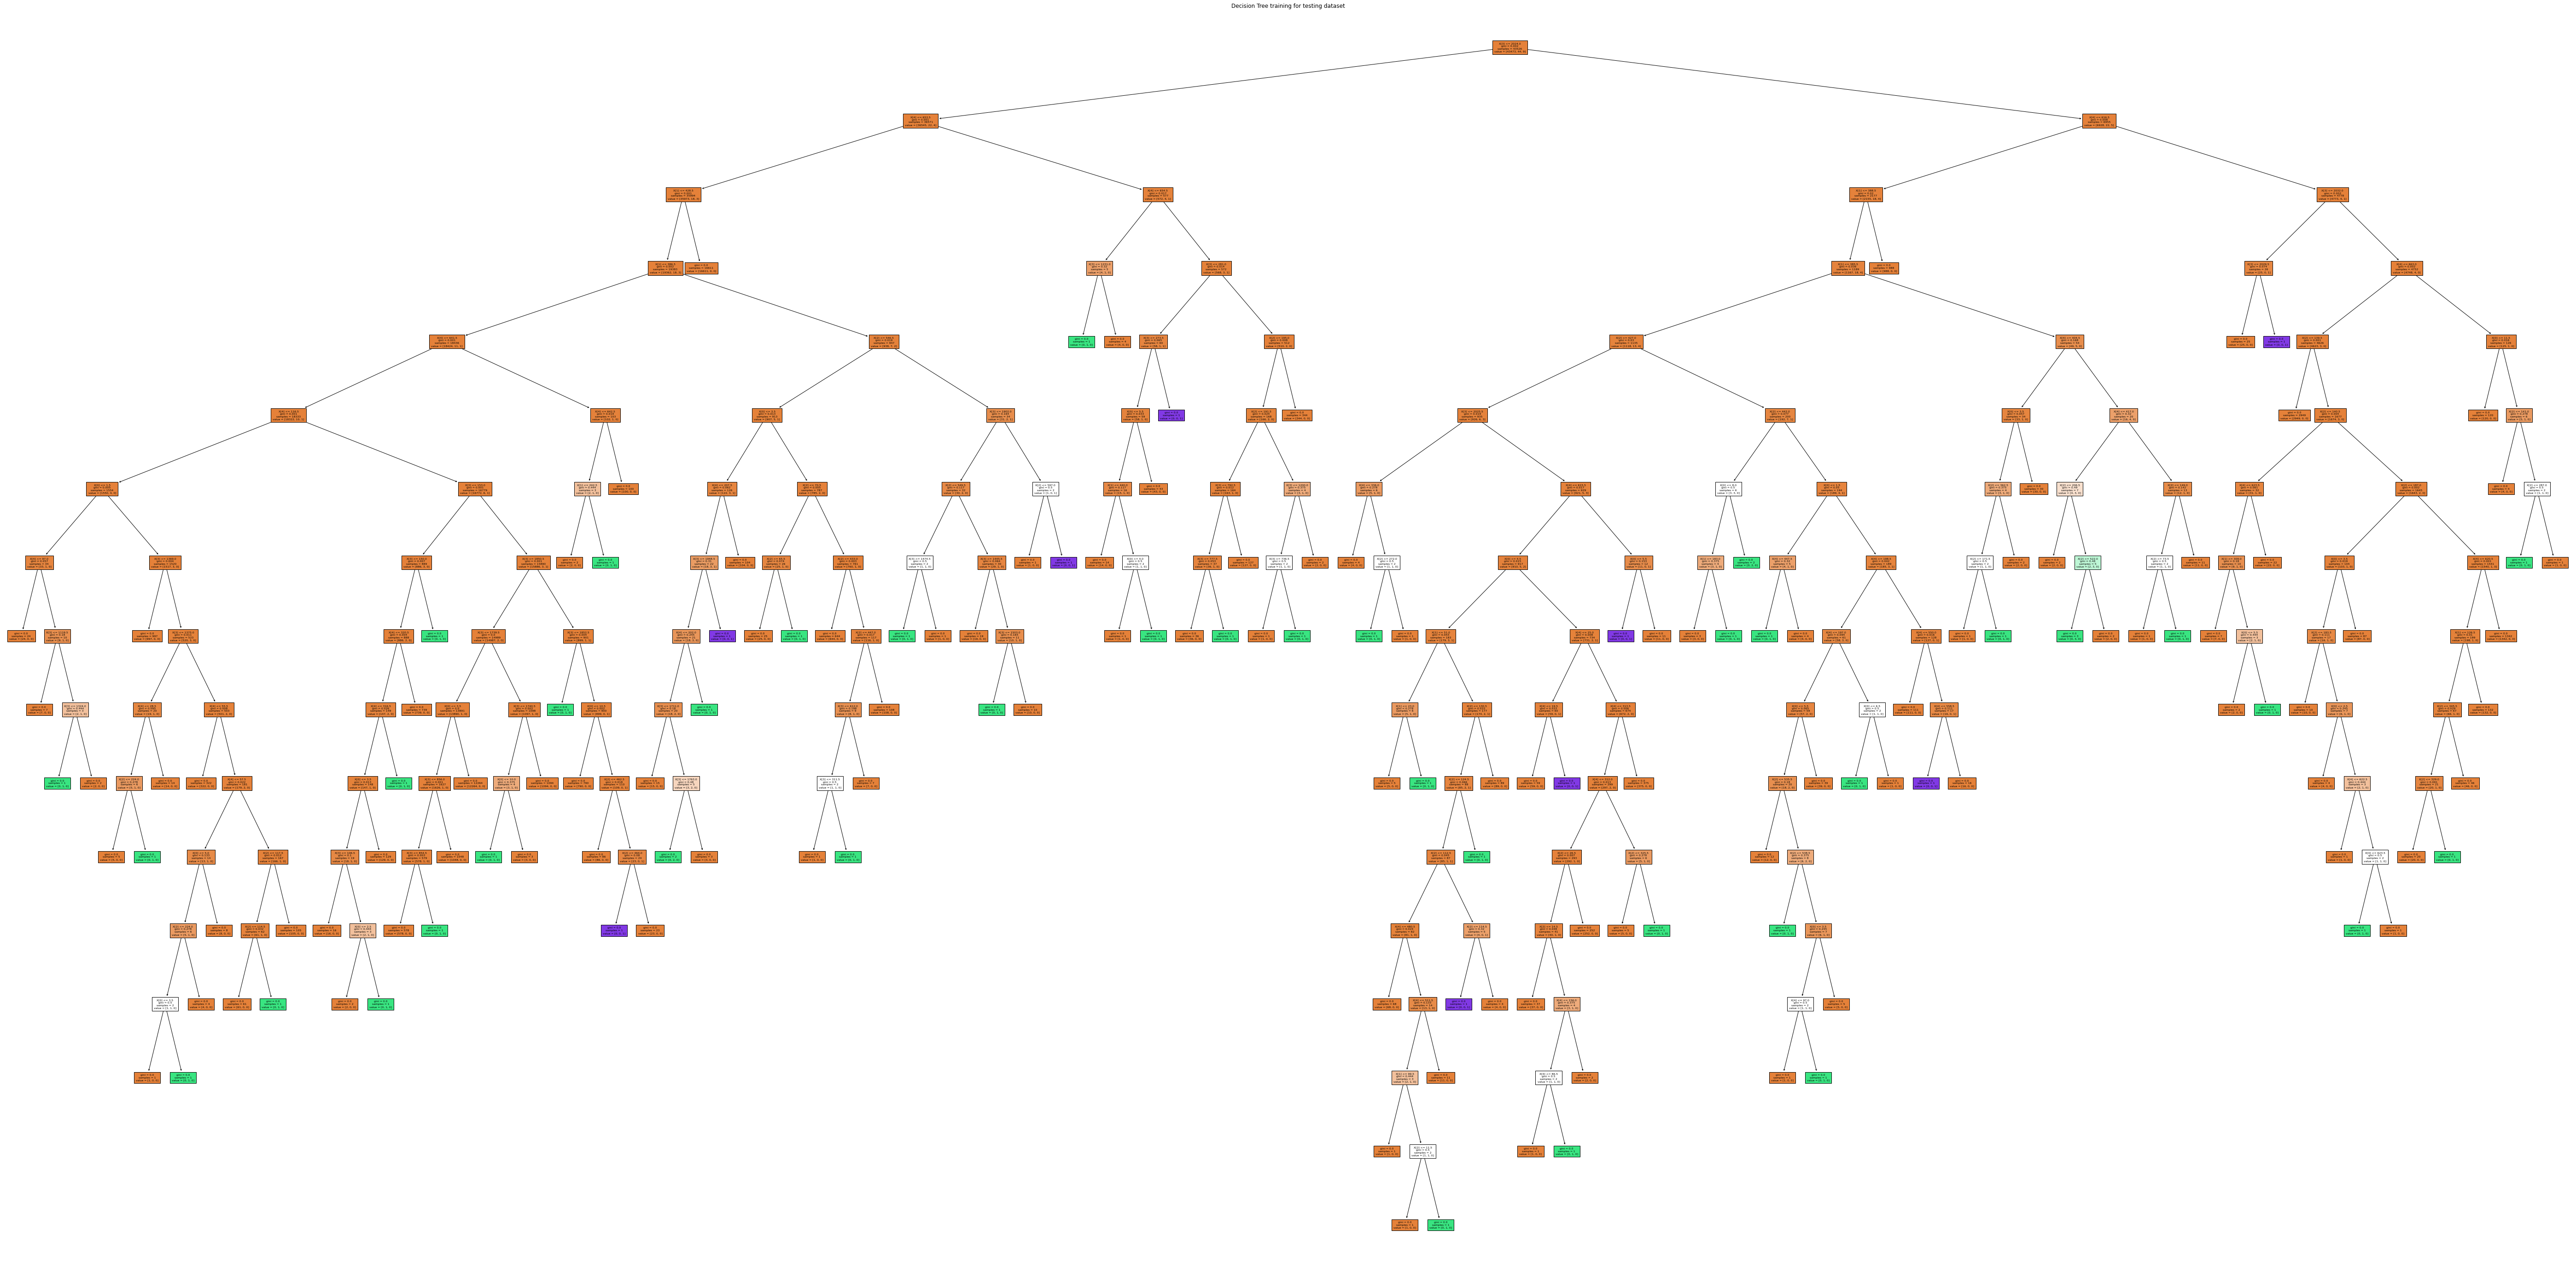

In [33]:
plt.figure(figsize=(100,50))
model = model.fit(X_test, y_test)
tree.plot_tree(model, filled = True, fontsize=6)
plt.title("Decision Tree training for testing dataset")
plt.savefig('test_tree_high_dpi', dpi=100)
plt.show()

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot

rf = RandomForestRegressor(n_estimators = 100, random_state = 16)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=16)

In [35]:
predictions = rf.predict(X_test)
feature_list=list(inputs_n.columns)

In [36]:
tree = rf.estimators_[5]

export_graphviz(tree, out_file = 'random_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('random_tree.dot')

graph.write_png('random_forest.png')


In [37]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=16)
rf_small.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=16)

In [38]:
tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = 'small_random_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_random_tree.dot')

graph.write_png('small_tree.png')

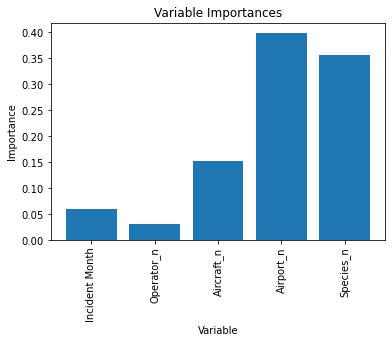

In [39]:
# list of x locations for plotting
importances = list(rf.feature_importances_)
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Interpretting with confusion  matrix

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

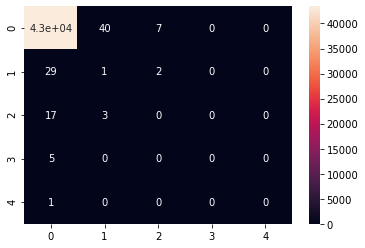

In [41]:
cm = confusion_matrix(y_test,y_pred)


cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

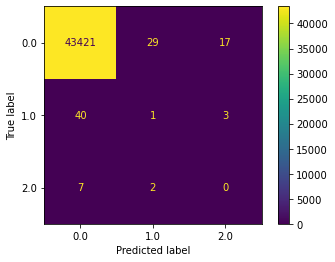

In [43]:
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# showing the matrix
plt.show()

### Support Vector Machine

In [44]:
from sklearn.svm import SVC

In [45]:
# svm = SVC(kernel="linear")
# svm.fit(X_train, y_train)

In [47]:
# fig = plt.figure(figsize=(10,10))
# plot_decision_regions(X_train, y_train, classifier=svm)
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

### More on unencoding the number labels

In [48]:
integerMapping=dict(zip(injuryRisk['Operator'],inputs['Operator_n']))
print(integerMapping)

{'DELTA AIR LINES': 181, 'HAWAIIAN AIR': 256, 'UNKNOWN': 493, 'MILITARY': 333, 'METRO EXPRESS': 323, '1US AIRWAYS': 0, 'BUSINESS': 121, 'SOUTHWEST AIRLINES': 447, 'PRIVATELY OWNED': 387, 'UPS AIRLINES': 495, 'EASTERN AIRLINE': 190, 'AIRNET EXPRESS': 60, 'ALOHA AIR CARGO': 74, 'LUFTHANSA': 305, 'AMERICAN AIRLINES': 78, 'UNITED AIRLINES': 491, 'NORTHWEST AIRLINES': 356, 'FEDEX EXPRESS': 223, 'FAA': 219, 'UNKNOWN COMMERCIAL': 494, 'AMERICA WEST AIRLINES': 77, 'AIR WISCONSIN AIRLINES': 59, 'ALL NIPPON AIRWAYS': 70, 'TRANS STATES AIRLINES': 477, 'COMAIR AIRLINES': 163, 'US COAST GUARD': 497, 'CENTRAL AIR SOUTHWEST': 145, 'CONTINENTAL AIRLINES': 168, 'BRITISH AIRWAYS': 118, 'ASTAR AIR CARGO': 89, 'PSA AIRLINES': 390, 'BERING AIR': 107, 'SAUDI ARABIAN AIRLINES': 420, 'MESABA AIRLINES': 321, 'ALOHA AIRLINES': 75, 'PAN AM': 367, 'BARON AVIATION SERVICES': 106, 'HENSON': 258, 'EMERY WORLDWIDE': 195, 'EL AL': 194, 'MIDWAY AIRLINES': 330, 'BUSINESS EXPRESS': 123, 'ATA AIRLINES': 90, 'ATLANTIC SOUT

In [49]:
opeartorLegend = pd.DataFrame.from_dict(integerMapping, orient='index')

In [50]:
opeartorLegend.drop_duplicates()

,0
DELTA AIR LINES,181
HAWAIIAN AIR,256
UNKNOWN,493
MILITARY,333
METRO EXPRESS,323
...,...
JETAIRFLY,278
NORWEGIAN,357
JEJU AIR,276
AEROLINEAS ARGENTINAS,15


Search by name.

In [51]:
opeartorLegend.loc['NORWEGIAN']

0    357
Name: NORWEGIAN, dtype: int64

Or by label number

In [52]:
opeartorLegend.set_index(0)
opeartorLegend.iloc[181]

0    407
Name: RICH INTL AIRWAY, dtype: int64